In [1]:
import numpy as np
import pandas as pd
import h5py
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import geopandas as gpd
import matplotlib.dates as md
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

In [2]:
def simple_read(path):
    with open(path) as f:
        first_line = f.readline()
        header_line = int(first_line[0:-2].split(",")[0])-1
        #all_lines = f.readlines()
    data = pd.read_csv(path, sep=',', skiprows=header_line)
    data.columns = [i.strip() for i in data.columns]
    #date = all_lines[5][0:10].split(',')
    #dt = datetime(int(date[0]), int(date[1]), int(date[2]))

    acc = 0
    boo = False
    for letter in path:
        if letter == '2':
            boo = True
        elif boo and letter == '0':
            acc -= 1
            break
        acc += 1
    #print(path[:acc+4], path[acc+4:acc+6], path[acc+6:acc+8])
    dt = datetime(int(path[acc:acc+4]), int(path[acc+4:acc+6]), int(path[acc+6:acc+8]))
    
    for column in data.keys():
        if 'Time' in column:
            data[column] = dt + pd.to_timedelta(data[column], unit='seconds')
    return data.replace(-999999, np.NaN)

In [3]:
DAY22 = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220602_R0_L1_20230921T222712.ict')
start_index = np.where(DAY22["Time_Start"] == pd.to_datetime("2022-06-02 12:58:55"))
stop_index = np.where(DAY22["Time_Start"] == pd.to_datetime("2022-06-02 13:10:00"))

DAY22_subset = DAY22[start_index[0][0]:stop_index[0][0]]


# Print the modified subset dataframe
# Drop rows with NaN values
DAY22_subset = DAY22_subset.dropna()
DAY22_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [4]:
DAY2 = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220602_R0_L1_20230921T222712.ict')
start_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(DAY2["Time_Start"] == pd.to_datetime("2022-06-02 14:11:00"))
DAY2_subset = DAY2[start_index[0][0]:stop_index[0][0]]

DAY2_subset = DAY2_subset.dropna()
DAY2_subset



,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [5]:
DAY2b = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220602_R0_L2_20230921T222712.ict')
start_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(DAY2b["Time_Start"]==pd.to_datetime("2022-06-02 18:53:00"))
DAY2b_subset = DAY2b[start_index[0][0]:stop_index[0][0]]
DAY2b_subset = DAY2b_subset.dropna()
DAY2b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [6]:
DAY7 = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220607_R0_L1_20230921T222713.ict')
start_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:47:00"))
    
DAY7_subset =DAY7[start_index[0][0]:stop_index[0][0]]

DAY7_subset = DAY7_subset.dropna()
DAY7_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
11015,2022-06-07 14:42:18,2022-06-07 14:42:19,32.247397,-65.033157,1740.89,1.01,1.475,0.64
11016,2022-06-07 14:42:19,2022-06-07 14:42:20,32.247765,-65.032024,1743.03,1.01,1.330,0.65


In [7]:
DAY7b = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220607_R0_L2_20230921T222713.ict')
start_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(DAY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:23:00"))
    
DAY7b_subset =DAY7b[start_index[0][0]:stop_index[0][0]]
DAY7b_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY7b_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)

DAY7b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [8]:
DAY8 = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220608_R0_L2_20230921T222714.ict')
start_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(DAY8["Time_Start"]==pd.to_datetime("2022-06-08 20:45:00"))
    
DAY8_subset = DAY8[start_index[0][0]:stop_index[0][0]]
DAY8_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY8_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)
DAY8_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [9]:
DAY10 = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220610_R0_L1_20230921T222714.ict')
start_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(DAY10["Time_Start"]==pd.to_datetime("2022-06-10 15:25:00"))
    
DAY10_subset = DAY10[start_index[0][0]:stop_index[0][0]]
DAY10_subset['fRH550_RH20to80_ZIEMBA'].fillna(0, inplace=True)

# Drop rows with NaN values in specified columns
DAY10_subset.dropna(subset=['AEscat_450to700nm_ZIEMBA', 'AEabsDRY_470to660nm_ZIEMBA'], inplace=True)
DAY10_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [10]:
DAY10b = simple_read('C:/Users/taiwoajayi/Documents/AEXponent/activate-mrg1_hu25_20220610_R0_L2_20230921T222714.ict')
start_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 19:51:00"))
    
DAY110b_subset = DAY10b[start_index[0][0]:stop_index[0][0]]
DAY110b_subset = DAY110b_subset.dropna()
DAY110b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [11]:
DAY10b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220610_R0_L2_20230918T232333.ict')
start_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 20:25:00"))
stop_index = np.where(DAY10b["Time_Start"]==pd.to_datetime("2022-06-10 20:35:00"))
    
DAY10b_subset = DAY10b[start_index[0][0]:stop_index[0][0]]
DAY10b_subset = DAY10b_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY10b_subset = DAY10b_subset.dropna()
DAY10b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [12]:
DAY11 = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220611_R0_L1_20230918T232334.ict')
start_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(DAY11["Time_Start"]==pd.to_datetime("2022-06-11 15:42:00"))
    
DAY11_subset = DAY11[start_index[0][0]:stop_index[0][0]]
DAY11_subset = DAY11_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY11_subset = DAY11_subset.dropna()
DAY11_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [13]:
DAY11b = simple_read('C:/Users/taiwoajayi/Documents/AExpo/activate-mrg1_hu25_20220611_R0_L2_20230918T232334.ict')
start_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:08:00"))
stop_index = np.where(DAY11b["Time_Start"]==pd.to_datetime("2022-06-11 20:15:39"))
    
DAY11b_subset = DAY11b[start_index[0][0]:stop_index[0][0]]
DAY11b_subset = DAY11b_subset.drop('AEscatAMB_450to700nm_ZIEMBA', axis=1)
DAY11b_subset = DAY11b_subset.dropna()
DAY11b_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [14]:
DAY13 = simple_read('C:/Users/taiwoajayi/Documents/AExponent/activate-mrg1_hu25_20220613_R0_L1_20230921T222716.ict')
start_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:30:00"))
stop_index = np.where(DAY13["Time_Start"]==pd.to_datetime("2022-06-13 14:46:00"))
    
DAY13_subset = DAY13[start_index[0][0]:stop_index[0][0]]
DAY13_subset = DAY13_subset.dropna()
DAY13_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10925,2022-06-13 14:45:10,2022-06-13 14:45:11,32.236952,-65.076787,4048.95,1.27,-0.480,1.760
10926,2022-06-13 14:45:11,2022-06-13 14:45:12,32.235827,-65.077019,4057.18,1.27,-0.655,1.855
10927,2022-06-13 14:45:12,2022-06-13 14:45:13,32.234696,-65.077210,4065.62,1.18,-0.750,1.825
10928,2022-06-13 14:45:13,2022-06-13 14:45:14,32.233559,-65.077359,4074.31,1.18,-0.815,1.735


In [15]:
DAY13b = simple_read('C:/Users/taiwoajayi/Documents/AExponent/activate-mrg1_hu25_20220613_R0_L2_20230921T222716.ict')
start_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(DAY13b["Time_Start"]==pd.to_datetime("2022-06-13 20:09:00")) 
DAY13b_subset = DAY13b[start_index[0][0]:stop_index[0][0]]
DAY13b_subset = DAY13b_subset.dropna()
DAY13b_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
11865,2022-06-13 20:06:55,2022-06-13 20:06:56,32.227739,-64.936458,3608.20,0.59,0.870,1.180
11866,2022-06-13 20:06:56,2022-06-13 20:06:57,32.228458,-64.935286,3616.72,0.59,0.770,1.190
11869,2022-06-13 20:06:59,2022-06-13 20:07:00,32.230786,-64.931933,3642.70,0.82,0.800,0.850
11870,2022-06-13 20:07:00,2022-06-13 20:07:01,32.231618,-64.930875,3652.06,0.82,0.880,0.980
11894,2022-06-13 20:07:24,2022-06-13 20:07:25,32.256892,-64.915229,3872.88,1.13,0.260,1.875
11895,2022-06-13 20:07:25,2022-06-13 20:07:26,32.258072,-64.915025,3882.62,1.13,0.165,1.815
11896,2022-06-13 20:07:26,2022-06-13 20:07:27,32.259254,-64.914864,3891.90,0.63,0.170,1.730
11897,2022-06-13 20:07:27,2022-06-13 20:07:28,32.260439,-64.914744,3900.74,0.63,0.245,1.670


In [16]:
DAY14 = simple_read('C:/Users/taiwoajayi/Documents/AExponent/activate-mrg1_hu25_20220614_R0_20230921T222716.ict')
start_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(DAY14["Time_Start"]==pd.to_datetime("2022-06-14 16:25:00"))
DAY14_subset = DAY14[start_index[0][0]:stop_index[0][0]]
DAY14_subset = DAY14_subset.dropna()
DAY14_subset


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
10446,2022-06-14 16:23:03,2022-06-14 16:23:04,30.695960,-64.420744,7838.71,0.950,-0.585,1.615
10447,2022-06-14 16:23:04,2022-06-14 16:23:05,30.697252,-64.421177,7843.90,0.855,-0.510,1.535
10448,2022-06-14 16:23:05,2022-06-14 16:23:06,30.698552,-64.421583,7849.04,0.760,-0.495,1.500
10452,2022-06-14 16:23:09,2022-06-14 16:23:10,30.703823,-64.422810,7870.24,1.020,-0.710,1.440
10453,2022-06-14 16:23:10,2022-06-14 16:23:11,30.705156,-64.422997,7876.28,0.840,-0.660,1.410
...,...,...,...,...,...,...,...,...
10554,2022-06-14 16:24:51,2022-06-14 16:24:52,30.844408,-64.438282,8429.20,0.665,0.020,1.140
10555,2022-06-14 16:24:52,2022-06-14 16:24:53,30.845820,-64.438510,8435.53,0.570,-0.075,1.075
10556,2022-06-14 16:24:53,2022-06-14 16:24:54,30.847232,-64.438738,8441.86,0.490,-0.175,0.945
10557,2022-06-14 16:24:54,2022-06-14 16:24:55,30.848644,-64.438963,8448.21,0.470,-0.300,0.865


In [17]:
DAY17 = simple_read('C:/Users/taiwoajayi/Documents/AExponent/activate-mrg1_hu25_20220617_R0_20230921T222716.ict')
start_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(DAY17["Time_Start"]==pd.to_datetime("2022-06-17 16:47:00")) 
DAY17_subset = DAY17[start_index[0][0]:stop_index[0][0]]
DAY17_subset = DAY17_subset.dropna()
DAY17_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
11518,2022-06-17 16:37:29,2022-06-17 16:37:30,32.178931,-65.016075,3111.76,1.46,-0.070,1.030
11519,2022-06-17 16:37:30,2022-06-17 16:37:31,32.178736,-65.014702,3118.89,0.65,-0.120,1.025
11520,2022-06-17 16:37:31,2022-06-17 16:37:32,32.178582,-65.013323,3126.06,0.65,-0.110,1.030
11533,2022-06-17 16:37:44,2022-06-17 16:37:45,32.180156,-64.995610,3217.78,1.46,0.845,1.300
11534,2022-06-17 16:37:45,2022-06-17 16:37:46,32.180550,-64.994324,3225.66,1.46,0.785,1.305
...,...,...,...,...,...,...,...,...
11966,2022-06-17 16:44:57,2022-06-17 16:44:58,32.187410,-64.933785,6869.25,0.60,2.155,1.415
11967,2022-06-17 16:44:58,2022-06-17 16:44:59,32.188649,-64.933712,6876.14,1.06,2.200,1.425
11968,2022-06-17 16:44:59,2022-06-17 16:45:00,32.189887,-64.933686,6882.92,1.06,2.250,1.415
11969,2022-06-17 16:45:00,2022-06-17 16:45:01,32.191123,-64.933707,6889.66,0.99,2.310,1.365


In [18]:

'''# Concatenate the dataframes vertically (along rows)
Africa_total = pd.concat([DAY13_subset, DAY13b_subset, DAY14_subset ], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Africa_total.reset_index(drop=True, inplace=True)
Africa_total'''

'# Concatenate the dataframes vertically (along rows)\nAfrica_total = pd.concat([DAY13_subset, DAY13b_subset, DAY14_subset ], axis=0)\n\n# Reset the index of the DAY2b_subsetd dataframe\nAfrica_total.reset_index(drop=True, inplace=True)\nAfrica_total'

In [19]:
# Concatenate the dataframes vertically (along rows)
Ocean_total = pd.concat([DAY2_subset, DAY22_subset, DAY2b_subset], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Ocean_total.reset_index(drop=True, inplace=True)
Ocean_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [20]:
# Concatenate the dataframes vertically (along rows)
Caribbean_total = pd.concat([DAY10_subset, DAY10b_subset, DAY11_subset, DAY11b_subset, DAY13_subset, DAY13b_subset, DAY14_subset], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
Caribbean_total.reset_index(drop=True, inplace=True)
Caribbean_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
0,2022-06-13 14:45:10,2022-06-13 14:45:11,32.236952,-65.076787,4048.95,1.270,-0.480,1.760
1,2022-06-13 14:45:11,2022-06-13 14:45:12,32.235827,-65.077019,4057.18,1.270,-0.655,1.855
2,2022-06-13 14:45:12,2022-06-13 14:45:13,32.234696,-65.077210,4065.62,1.180,-0.750,1.825
3,2022-06-13 14:45:13,2022-06-13 14:45:14,32.233559,-65.077359,4074.31,1.180,-0.815,1.735
4,2022-06-13 20:06:55,2022-06-13 20:06:56,32.227739,-64.936458,3608.20,0.590,0.870,1.180
...,...,...,...,...,...,...,...,...
70,2022-06-14 16:24:51,2022-06-14 16:24:52,30.844408,-64.438282,8429.20,0.665,0.020,1.140
71,2022-06-14 16:24:52,2022-06-14 16:24:53,30.845820,-64.438510,8435.53,0.570,-0.075,1.075
72,2022-06-14 16:24:53,2022-06-14 16:24:54,30.847232,-64.438738,8441.86,0.490,-0.175,0.945
73,2022-06-14 16:24:54,2022-06-14 16:24:55,30.848644,-64.438963,8448.21,0.470,-0.300,0.865


In [21]:
# Concatenate the dataframes vertically (along rows)
North_America_total = pd.concat([DAY7_subset, DAY7b_subset, DAY8_subset, DAY17_subset], axis=0)

# Reset the index of the DAY2b_subsetd dataframe
North_America_total.reset_index(drop=True, inplace=True)
North_America_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
0,2022-06-07 14:42:18,2022-06-07 14:42:19,32.247397,-65.033157,1740.89,1.01,1.475,0.640
1,2022-06-07 14:42:19,2022-06-07 14:42:20,32.247765,-65.032024,1743.03,1.01,1.330,0.650
2,2022-06-17 16:37:29,2022-06-17 16:37:30,32.178931,-65.016075,3111.76,1.46,-0.070,1.030
3,2022-06-17 16:37:30,2022-06-17 16:37:31,32.178736,-65.014702,3118.89,0.65,-0.120,1.025
4,2022-06-17 16:37:31,2022-06-17 16:37:32,32.178582,-65.013323,3126.06,0.65,-0.110,1.030
...,...,...,...,...,...,...,...,...
163,2022-06-17 16:44:57,2022-06-17 16:44:58,32.187410,-64.933785,6869.25,0.60,2.155,1.415
164,2022-06-17 16:44:58,2022-06-17 16:44:59,32.188649,-64.933712,6876.14,1.06,2.200,1.425
165,2022-06-17 16:44:59,2022-06-17 16:45:00,32.189887,-64.933686,6882.92,1.06,2.250,1.415
166,2022-06-17 16:45:00,2022-06-17 16:45:01,32.191123,-64.933707,6889.66,0.99,2.310,1.365


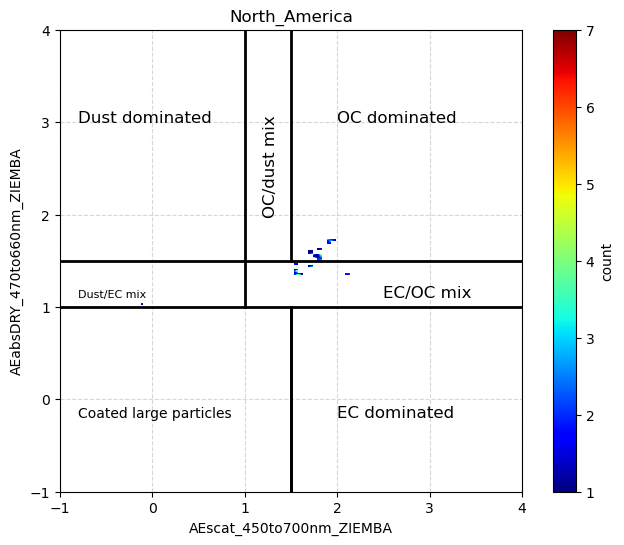

In [22]:
# Your data and histogram code...

# Data
x = North_America_total['AEscat_450to700nm_ZIEMBA']
y = North_America_total['AEabsDRY_470to660nm_ZIEMBA']
# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50)
hist = np.where(hist == 0, np.nan, hist)
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.imshow(hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar(label='count')
plt.xlabel('AEscat_450to700nm_ZIEMBA')
plt.ylabel('AEabsDRY_470to660nm_ZIEMBA')
plt.title('North_America')
plt.grid(True, linestyle='--', alpha=0.5)

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
plt.plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle

# Add category lines and labels
plt.plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
plt.plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 

# Add category lines and labels
plt.plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
plt.plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated

# Add category lines and labels
plt.plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
plt.plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 



# Add other category lines...
# ...

# Add category labels
plt.text(2, -0.2, 'EC dominated', fontsize=12, color='k')
plt.text(2, 3, 'OC dominated', fontsize=12, color='k')
plt.text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
plt.text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
plt.text(-0.8, -0.2, 'Coated large particles', fontsize=10, color='k')
plt.text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
plt.text(-0.8, 1.1, 'Dust/EC mix', fontsize=8, color='k')
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()


In [23]:

# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    }
}


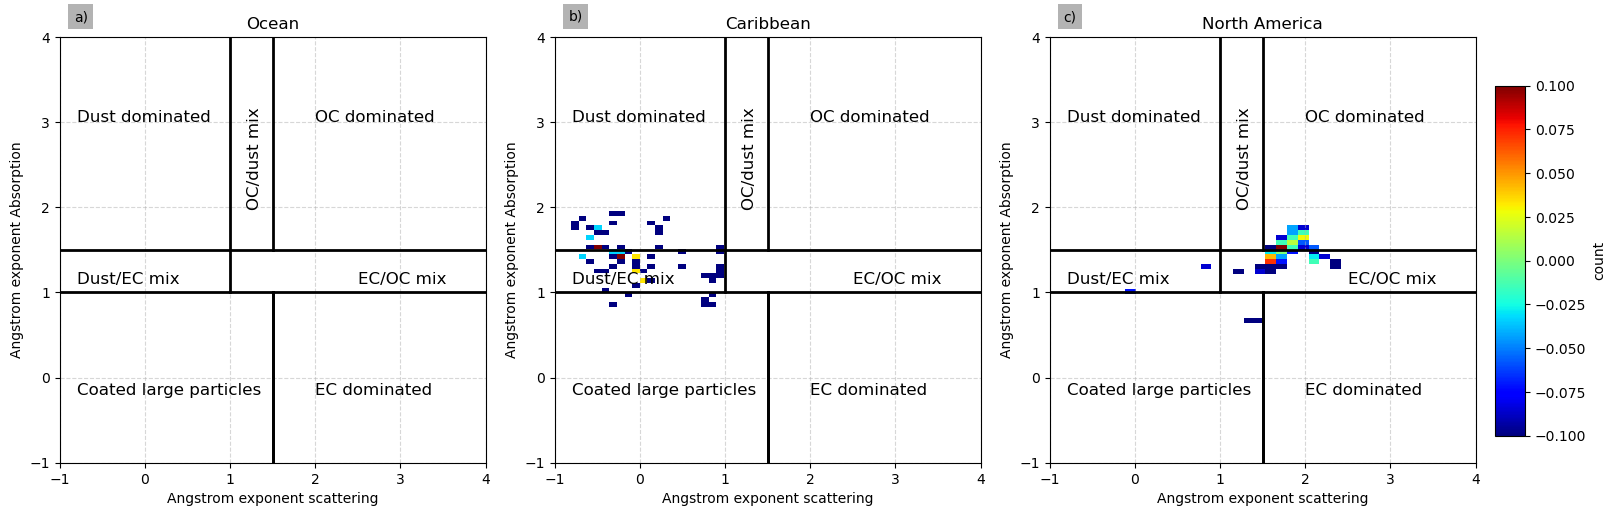

In [32]:
from matplotlib.transforms import ScaledTranslation

# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    }
}

## Create a 1x3 subplot grid
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Initialize a list to store the histogram images
hist_images = []

# Loop through the data and create subplots
for i, (key, values) in enumerate(data.items()):
    x = values['x']
    y = values['y']
    title = values['title']

    # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(x, y, bins=20)
    hist = np.where(hist == 0, np.nan, hist)

    # Plot the histogram inside the corresponding subplot
    im = ax[i].imshow(
        hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1], ], cmap='jet'
    )
    # Store the histogram image in the list
    hist_images.append(im)

    # Set subplot labels and title
    ax[i].set_xlabel('Angstrom exponent scattering')
    ax[i].set_ylabel('Angstrom exponent Absorption')
    ax[i].set_title(title)
    ax[i].grid(True, linestyle='--', alpha=0.5)

# Define labels 'a)', 'b)', 'c)'
labels = ['a)', 'b)', 'c)']

# Add labels 'a)', 'b)', 'c)' and other elements
for i in range(3):
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax[i].text(
        0.0, 1.08, labels[i],
        transform=ax[i].transAxes + trans,
        fontsize='medium', verticalalignment='top',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=4.0)
    )

# Add category lines and labels (adjust these as needed)
for i in range(3):
    ax[i].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
    ax[i].plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle
    ax[i].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
    ax[i].plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 
    ax[i].plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
    ax[i].plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated
    ax[i].plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
    ax[i].plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 
    ax[i].text(2, -0.2, 'EC dominated', fontsize=12, color='k')
    ax[i].text(2, 3, 'OC dominated', fontsize=12, color='k')
    ax[i].text(1.2, 2, 'OC/dust mix', fontsize=12, color='k', rotation='vertical')
    ax[i].text(-0.8, 3, 'Dust dominated', fontsize=12, color='k')
    ax[i].text(-0.8, -0.2, 'Coated large particles', fontsize=12, color='k')
    ax[i].text(2.5, 1.1, 'EC/OC mix', fontsize=12, color='k')
    ax[i].text(-0.8, 1.1, 'Dust/EC mix', fontsize=12, color='k')

# Create a single color bar for all subplots
cax = fig.add_axes([1.0, 0.15, 0.02, 0.7])
cbar = plt.colorbar(hist_images[0], cax=cax)
cbar.set_label('count')

# Set common axis limits for all subplots
for i in range(3):
    ax[i].set_ylim(-1, 4)
    ax[i].set_xlim(-1, 4)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
'''# Data for the four subplots (replace with your actual data)
data = {
    'Ocean_total': {
        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Ocean'
    },
    'North America_total': {
        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],
        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North America'
    },
    'Africa_total': {
        'x': Africa_total['AEscat_450to700nm_ZIEMBA'],
        'y': Africa_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'North Africa'
    },
    'Caribbean_total': {
        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],
        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],
        'title': 'Caribbean'
    }
}

# Create a 2x2 subplot grid
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharey='row', sharex='all')

# Initialize a list to store the histogram images
hist_images = []

# Loop through the data and create subplots
for i, (key, values) in enumerate(data.items()):
    x = values['x']
    y = values['y']
    title = values['title']

    # Create a 2D histogram
    hist, xedges, yedges = np.histogram2d(x, y, bins=20)
    hist = np.where(hist == 0, np.nan, hist)
    #hist = hist[~np.isnan(hist)]

    # Plot the histogram inside the corresponding subplot
    im = ax[i // 2, i % 2].imshow(
        hist.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet'
    )
    
    # Store the histogram image in the list
    hist_images.append(im)

    # Set subplot labels and title
    ax[i // 2, i % 2].set_xlabel('Angstrom exponent scattering')
    ax[i // 2, i % 2].set_ylabel('Angstrom exponent Absorption')
    ax[i // 2, i % 2].set_title(title)
    ax[i // 2, i % 2].grid(True, linestyle='--', alpha=0.5)

# Define labels 'a)', 'b)', 'c)', 'd)'
labels = ['a)', 'b)', 'c)', 'd)']

# Add labels 'a)', 'b)', 'c)', 'd)' and other elements
for i in range(4):
    trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    ax[i // 2, i % 2].text(
        0.0, 1.08, labels[i],
        transform=ax[i // 2, i % 2].transAxes + trans,
        fontsize='medium', verticalalignment='top',
        bbox=dict(facecolor='0.7', edgecolor='none', pad=4.0)
    )

# Add category lines and labels (adjust these as needed)
for i in range(2):
    for j in range(2):
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # Solid dashed line for coated large particle
        ax[i, j].plot([-1.5, 1.5], [1, 1], color='k', linestyle='-', linewidth=2)   # Solid dashed line coated large particle
        ax[i, j].plot([1.5, 1.5], [-1, 1], color='k', linestyle='-', linewidth=2)  # EC/OC
        ax[i, j].plot([1.5, 4], [1, 1], color='k', linestyle='-', linewidth=2)   # EC/OC 
        ax[i, j].plot([1, 1], [1, 4], color='k', linestyle='-', linewidth=2)  # dust dominated
        ax[i, j].plot([-1, 1], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   # dust dominated
        ax[i, j].plot([1.5, 1.5], [1.5, 4], color='k', linestyle='-', linewidth=2)  # OC dominated
        ax[i, j].plot([1, 4], [1.5, 1.5], color='k', linestyle='-', linewidth=2)   #OC 

        ax[i, j].text(2, -0.2, 'EC dominated', fontsize=10, color='k')
        ax[i, j].text(2, 3, 'OC dominated', fontsize=10, color='k')
        ax[i, j].text(1.2, 2, 'OC/dust mix', fontsize=10, color='k', rotation='vertical')
        ax[i, j].text(-0.8, 3, 'Dust dominated', fontsize=10, color='k')
        ax[i, j].text(-0.9, -0.2, 'Coated large particles', fontsize=10, color='k')
        ax[i, j].text(2.5, 1.1, 'EC/OC mix', fontsize=10, color='k')
        ax[i, j].text(-0.8, 1.1, 'Dust/EC mix', fontsize=10, color='k')

# Create a single color bar for all subplots
cax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
cbar = plt.colorbar(hist_images[0], cax=cax)
cbar.set_label('count')

for i in range(2):
    ax[i, 0].set_ylim(-1, 4)
    ax[i, 0].set_xlim(-1, 4)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()'''


"# Data for the four subplots (replace with your actual data)\ndata = {\n    'Ocean_total': {\n        'x': Ocean_total['AEscat_450to700nm_ZIEMBA'],\n        'y': Ocean_total['AEabsDRY_470to660nm_ZIEMBA'],\n        'title': 'Ocean'\n    },\n    'North America_total': {\n        'x': North_America_total['AEscat_450to700nm_ZIEMBA'],\n        'y': North_America_total['AEabsDRY_470to660nm_ZIEMBA'],\n        'title': 'North America'\n    },\n    'Africa_total': {\n        'x': Africa_total['AEscat_450to700nm_ZIEMBA'],\n        'y': Africa_total['AEabsDRY_470to660nm_ZIEMBA'],\n        'title': 'North Africa'\n    },\n    'Caribbean_total': {\n        'x': Caribbean_total['AEscat_450to700nm_ZIEMBA'],\n        'y': Caribbean_total['AEabsDRY_470to660nm_ZIEMBA'],\n        'title': 'Caribbean'\n    }\n}\n\n# Create a 2x2 subplot grid\nfig, ax = plt.subplots(2, 2, figsize=(10, 8), sharey='row', sharex='all')\n\n# Initialize a list to store the histogram images\nhist_images = []\n\n# Loop through t

In [26]:
# Apply the conditions to filter the data
coated_North_America_total = North_America_total[
    (North_America_total['AEscat_450to700nm_ZIEMBA'] <= 1.499) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] <= 0.999)
]

coated_North_America_total
EC_North_America_total = North_America_total[
    (North_America_total['AEscat_450to700nm_ZIEMBA'] >= 1.5) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] <= 0.999)
]

EC_North_America_total

Dust_North_America_total = North_America_total[
    (North_America_total['AEscat_450to700nm_ZIEMBA'] <= 0.999) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1.5)
]

Dust_North_America_total

Dust_EC_North_America_total = North_America_total[
    ((North_America_total['AEscat_450to700nm_ZIEMBA'] <=0.999) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1)  & (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] <= 1.5))
]

Dust_EC_North_America_total

EC_OC_North_America_total = North_America_total[
    ((North_America_total['AEscat_450to700nm_ZIEMBA'] >=1.5) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1)  & (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] <= 1.499))
]

EC_OC_North_America_total

OC_North_America_total = North_America_total[
    (North_America_total['AEscat_450to700nm_ZIEMBA'] >=1.5) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1.5)
]

OC_North_America_total

OC_dust_North_America_total = North_America_total[
    ((North_America_total['AEscat_450to700nm_ZIEMBA'] >=1)  & (North_America_total['AEscat_450to700nm_ZIEMBA'] <= 1.499)) &
    (North_America_total['AEabsDRY_470to660nm_ZIEMBA'] >= 1.5)
]

OC_dust_North_America_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA


In [27]:
Dust_EC_North_America_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
2,2022-06-17 16:37:29,2022-06-17 16:37:30,32.178931,-65.016075,3111.76,1.46,-0.070,1.030
3,2022-06-17 16:37:30,2022-06-17 16:37:31,32.178736,-65.014702,3118.89,0.65,-0.120,1.025
4,2022-06-17 16:37:31,2022-06-17 16:37:32,32.178582,-65.013323,3126.06,0.65,-0.110,1.030
5,2022-06-17 16:37:44,2022-06-17 16:37:45,32.180156,-64.995610,3217.78,1.46,0.845,1.300
6,2022-06-17 16:37:45,2022-06-17 16:37:46,32.180550,-64.994324,3225.66,1.46,0.785,1.305


In [28]:
OC_North_America_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
7,2022-06-17 16:42:09,2022-06-17 16:42:10,32.236615,-64.971904,5516.92,0.780,1.860,1.735
8,2022-06-17 16:42:10,2022-06-17 16:42:11,32.237076,-64.973282,5526.00,0.730,1.880,1.775
9,2022-06-17 16:42:11,2022-06-17 16:42:12,32.237499,-64.974676,5534.97,0.740,1.880,1.785
10,2022-06-17 16:42:12,2022-06-17 16:42:13,32.237886,-64.976086,5543.82,0.685,1.875,1.775
11,2022-06-17 16:42:13,2022-06-17 16:42:14,32.238233,-64.977511,5552.60,0.810,1.870,1.755
...,...,...,...,...,...,...,...,...
145,2022-06-17 16:44:39,2022-06-17 16:44:40,32.166336,-64.942723,6738.74,0.905,2.025,1.505
146,2022-06-17 16:44:40,2022-06-17 16:44:41,32.167385,-64.941859,6745.83,0.975,2.045,1.505
147,2022-06-17 16:44:41,2022-06-17 16:44:42,32.168455,-64.941035,6752.91,1.015,2.065,1.510
148,2022-06-17 16:44:42,2022-06-17 16:44:43,32.169545,-64.940254,6760.01,1.000,2.075,1.520


In [29]:
EC_OC_North_America_total

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,fRH550_RH20to80_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA
33,2022-06-17 16:42:35,2022-06-17 16:42:36,32.235964,-65.009653,5746.94,0.92,1.795,1.485
34,2022-06-17 16:42:36,2022-06-17 16:42:37,32.235417,-65.011019,5755.83,0.92,1.785,1.480
39,2022-06-17 16:42:41,2022-06-17 16:42:42,32.232153,-65.017531,5799.91,1.02,1.715,1.470
40,2022-06-17 16:42:42,2022-06-17 16:42:43,32.231399,-65.018764,5808.69,1.06,1.715,1.430
41,2022-06-17 16:42:43,2022-06-17 16:42:44,32.230615,-65.019970,5817.50,1.07,1.725,1.420
...,...,...,...,...,...,...,...,...
163,2022-06-17 16:44:57,2022-06-17 16:44:58,32.187410,-64.933785,6869.25,0.60,2.155,1.415
164,2022-06-17 16:44:58,2022-06-17 16:44:59,32.188649,-64.933712,6876.14,1.06,2.200,1.425
165,2022-06-17 16:44:59,2022-06-17 16:45:00,32.189887,-64.933686,6882.92,1.06,2.250,1.415
166,2022-06-17 16:45:00,2022-06-17 16:45:01,32.191123,-64.933707,6889.66,0.99,2.310,1.365


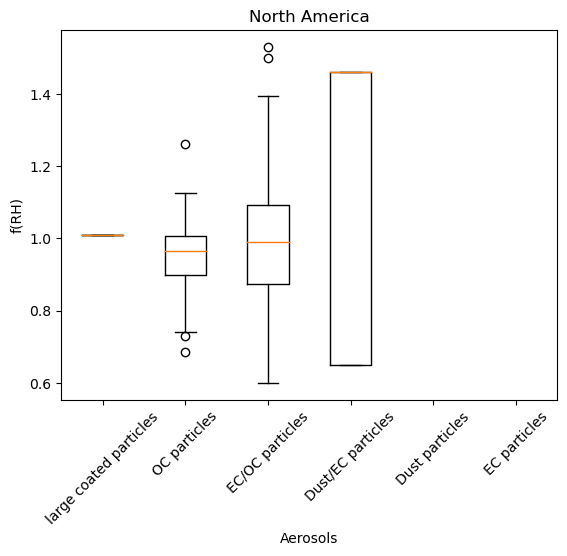

In [30]:

# Assuming you have a list of DataFrames with corresponding labels
dataframes_with_labels = [(coated_North_America_total, 'large coated particles'),
    (OC_North_America_total, 'OC particles'),
    (EC_OC_North_America_total, 'EC/OC particles'),
    (Dust_EC_North_America_total, 'Dust/EC particles'),
    (Dust_North_America_total, 'Dust particles'),
    (EC_North_America_total, 'EC particles')
]

# Create a figure and axis
fig, ax = plt.subplots()

# Create an empty list to store the data for plotting
data_to_plot = []

# Create a list to store the labels
labels = []

# Extract and store the 'fRH550_RH20to80_ZIEMBA' column from each DataFrame and labels
for df, label in dataframes_with_labels:
    data_to_plot.append(df['fRH550_RH20to80_ZIEMBA'].tolist())
    labels.append(label)

# Create the box and whisker plot
ax.boxplot(data_to_plot, labels=labels)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Set labels and title
ax.set_xlabel('Aerosols')
ax.set_ylabel('f(RH)')
ax.set_title('North America')

# Show the plot
plt.show()
